<a href="https://colab.research.google.com/github/aarongraybill/Math210/blob/main/ProblemSets/ProblemSet4/ProblemSet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Math 210
## Aaron Graybill
### Problem Set 4
### 3/11/21

## Problem 1.

In [15]:
def print_tableau(a,indep_names,dep_names):
#
# Given matrix "a" and lists of variables names "indep_names" and "dep_names",
# this function prints the matrix and labels in standard tableau format
# (including adding the -1, the minus signs in the last column, and labeling the lower-right as obj)
#
# First, check the inputs: indep_names should be one shorter than the number of columns of A
#                          dep_names should be one shorter than the number of rows of A
#
    nrows = a.shape[0]    # use the shape function to determine number of rows and cols in A
    ncols = a.shape[1]
    nindep = len(indep_names)
    ndep = len(dep_names)
    if nindep != ncols-1:
        print("WARNING: # of indep vbles should be one fewer than # columns of matrix")
    if ndep != nrows-1:
        print("WARNING: # of dep vbles should be one fewer than # rows of matrix")
# Now do the printing (uses a variety of formatting techniques in Python)        
    for j in range(ncols-1):                    # Print the independent variables in the first row
        print(indep_names[j].rjust(10),end="")  # rjust(10) makes fields 10 wide and right-justifies;
                                                #    the end command prevents newline)
    print("        -1")                         # Tack on the -1 at the end of the first row
    for i in range(nrows-1):
        for j in range(ncols):                  # Print all but the last row of the matrix
            print("%10.3f" % a[i][j],end="") # The syntax prints in a field 10 wide, showing 3 decimal points
        lab = "= -" + dep_names[i]
        print(lab.rjust(10))
    for j in range(ncols):
        print("%10.3f" % a[nrows-1][j],end="")  # Print the last row of the matrix, with label "obj" at end
    lab = "= obj"
    print(lab.rjust(10))
    print(" ")    # Put blank line at bottom

In [11]:
def pivot(a,pivrow,pivcol,indep_names,dep_names) :
# 
# Given matrix "a", a row number "pivrow" and column number "pivcol", 
#  and lists of variable names "indep_names" and "dep_names", this
#  function does three things:
#    (1) outputs the new version of the matrix after a pivot,
#    (2) updates the lists of variable names post-pivot
#    (3) prints the new matrix, including labels showing the variable names
#
# First, check the inputs: indep_names should be one shorter than the number of columns of A
#                          dep_names should be one shorter than the number of rows of A
#                          you should not be pivoting on the last row or last column
#
    a = a.astype(float)   # make sure entries are treated as floating point numbers
    nrows = a.shape[0]    # use the shape function to determine number of rows and cols in A
    ncols = a.shape[1]
    nindep = len(indep_names)
    ndep = len(dep_names)
    if nindep != ncols-1:
        print("WARNING: # of indep vbles should be one fewer than # columns of matrix")
    if ndep != nrows-1:
        print("WARNING: # of dep vbles should be one fewer than # rows of matrix")
    if pivrow > nrows-1 or pivcol > ncols-1:
        print("WARNING: should not pivot on last row or column")
    newa = a.copy()       # make a copy of A, to be filled in below with result of pivot
    p = a[pivrow-1][pivcol-1]   # identify pivot element
    newa[pivrow-1][pivcol-1] = 1/p   # set new value of pivot element
    # Set entries in p's row
    for j in range(ncols):
        if j != pivcol-1:
            newa[pivrow-1][j]=a[pivrow-1][j]/p;
    # Set entries in p's column
    for i in range(nrows):
        if i != pivrow-1:
            newa[i][pivcol-1]=-a[i][pivcol-1]/p;
    # Set all other entries
    for i in range(nrows):
        for j in range(ncols):
            if i != pivrow-1 and j != pivcol-1:
                r = a[i][pivcol-1]
                q = a[pivrow-1][j]
                s = a[i][j]
                newa[i][j]=(p*s-q*r)/p
    # Now swap the variable names
    temp = indep_names[pivcol-1]
    indep_names[pivcol-1]=dep_names[pivrow-1]
    dep_names[pivrow-1]=temp
    print_tableau(newa,indep_names,dep_names) # Print the matrix with updated labels
    return newa;

In [4]:
def target(a) :
    nrows = a.shape[0]    # use the shape function to determine number of rows and cols in "a"
    ncols = a.shape[1]
    import numpy as np
    v = np.empty(ncols-1)
    for i in range(ncols-1):
        v[i]=a[nrows-1,i]
    biggest_c = np.max(v)
    where_is_biggest_c = np.argmax(v)+1
    if biggest_c > 0 :
        return where_is_biggest_c
    else :
        return -1

In [12]:
def select(a,pivcolnum) :
    nrows = a.shape[0]    # use the shape function to determine number of rows and cols in A
    ncols = a.shape[1]
# First task: work down the column and record the b/a ratios in a vector v
#     except record -1 if a is negative or zero
    import numpy as np
    v = np.zeros(nrows-1)
    for i in range(nrows-1):
        if a[i,pivcolnum-1]>0 :
            v[i] = a[i,ncols-1]/a[i,pivcolnum-1]
        else :
            v[i] = -1
# Second task: if max b/a > -1, find min b/a by hand (ignoring zero entries in v)
    if np.max(v) > -1 :  
        min_so_far = np.max(v)+1  # Initialize variable to be for-sure bigger than the min
        for i in range(nrows-1):
            if v[i] > -1 and v[i] < min_so_far :
                min_so_far = v[i]
                where_is_min = i+1   # Add 1 to use human numbering
        return where_is_min      # Once we've scanned v for min, we can return result
    else :          
        return -1

In [13]:
# Create Simplex BF
def SimplexBF(a,indep_names,dep_names):
  nrows, ncols = a.shape
  a_new = a
  print_tableau(a_new,indep_names,dep_names)
  while np.max(a_new[nrows-1,:-1])>0:
    pivcol=target(a_new)
    pivrow=select(a_new,pivcol)
    if pivrow == -1:
      return("Unbounded")
    else:
      a_new=pivot(a_new,pivrow,pivcol,indep_names,dep_names)
      print_tableau(a_new,indep_names,dep_names)



In [17]:
import numpy as np
np.set_printoptions(suppress=True) 
a = np.array([[-1,-1,1],
              [-2,-4,7],
             [1,1,0]])
indep_names = ["x1","x2"]
dep_names = ["t1","t2"]
print_tableau(a,indep_names,dep_names)

        x1        x2        -1
    -1.000    -1.000     1.000     = -t1
    -2.000    -4.000     7.000     = -t2
     1.000     1.000     0.000     = obj
 


In [18]:
SimplexBF(a,indep_names,dep_names)

        x1        x2        -1
    -1.000    -1.000     1.000     = -t1
    -2.000    -4.000     7.000     = -t2
     1.000     1.000     0.000     = obj
 


'Unbounded'

## Problem 2.


## Problem 6.
The first step is to figure out which patterns produce what quantities of what cuts. The following table shows that relationship:
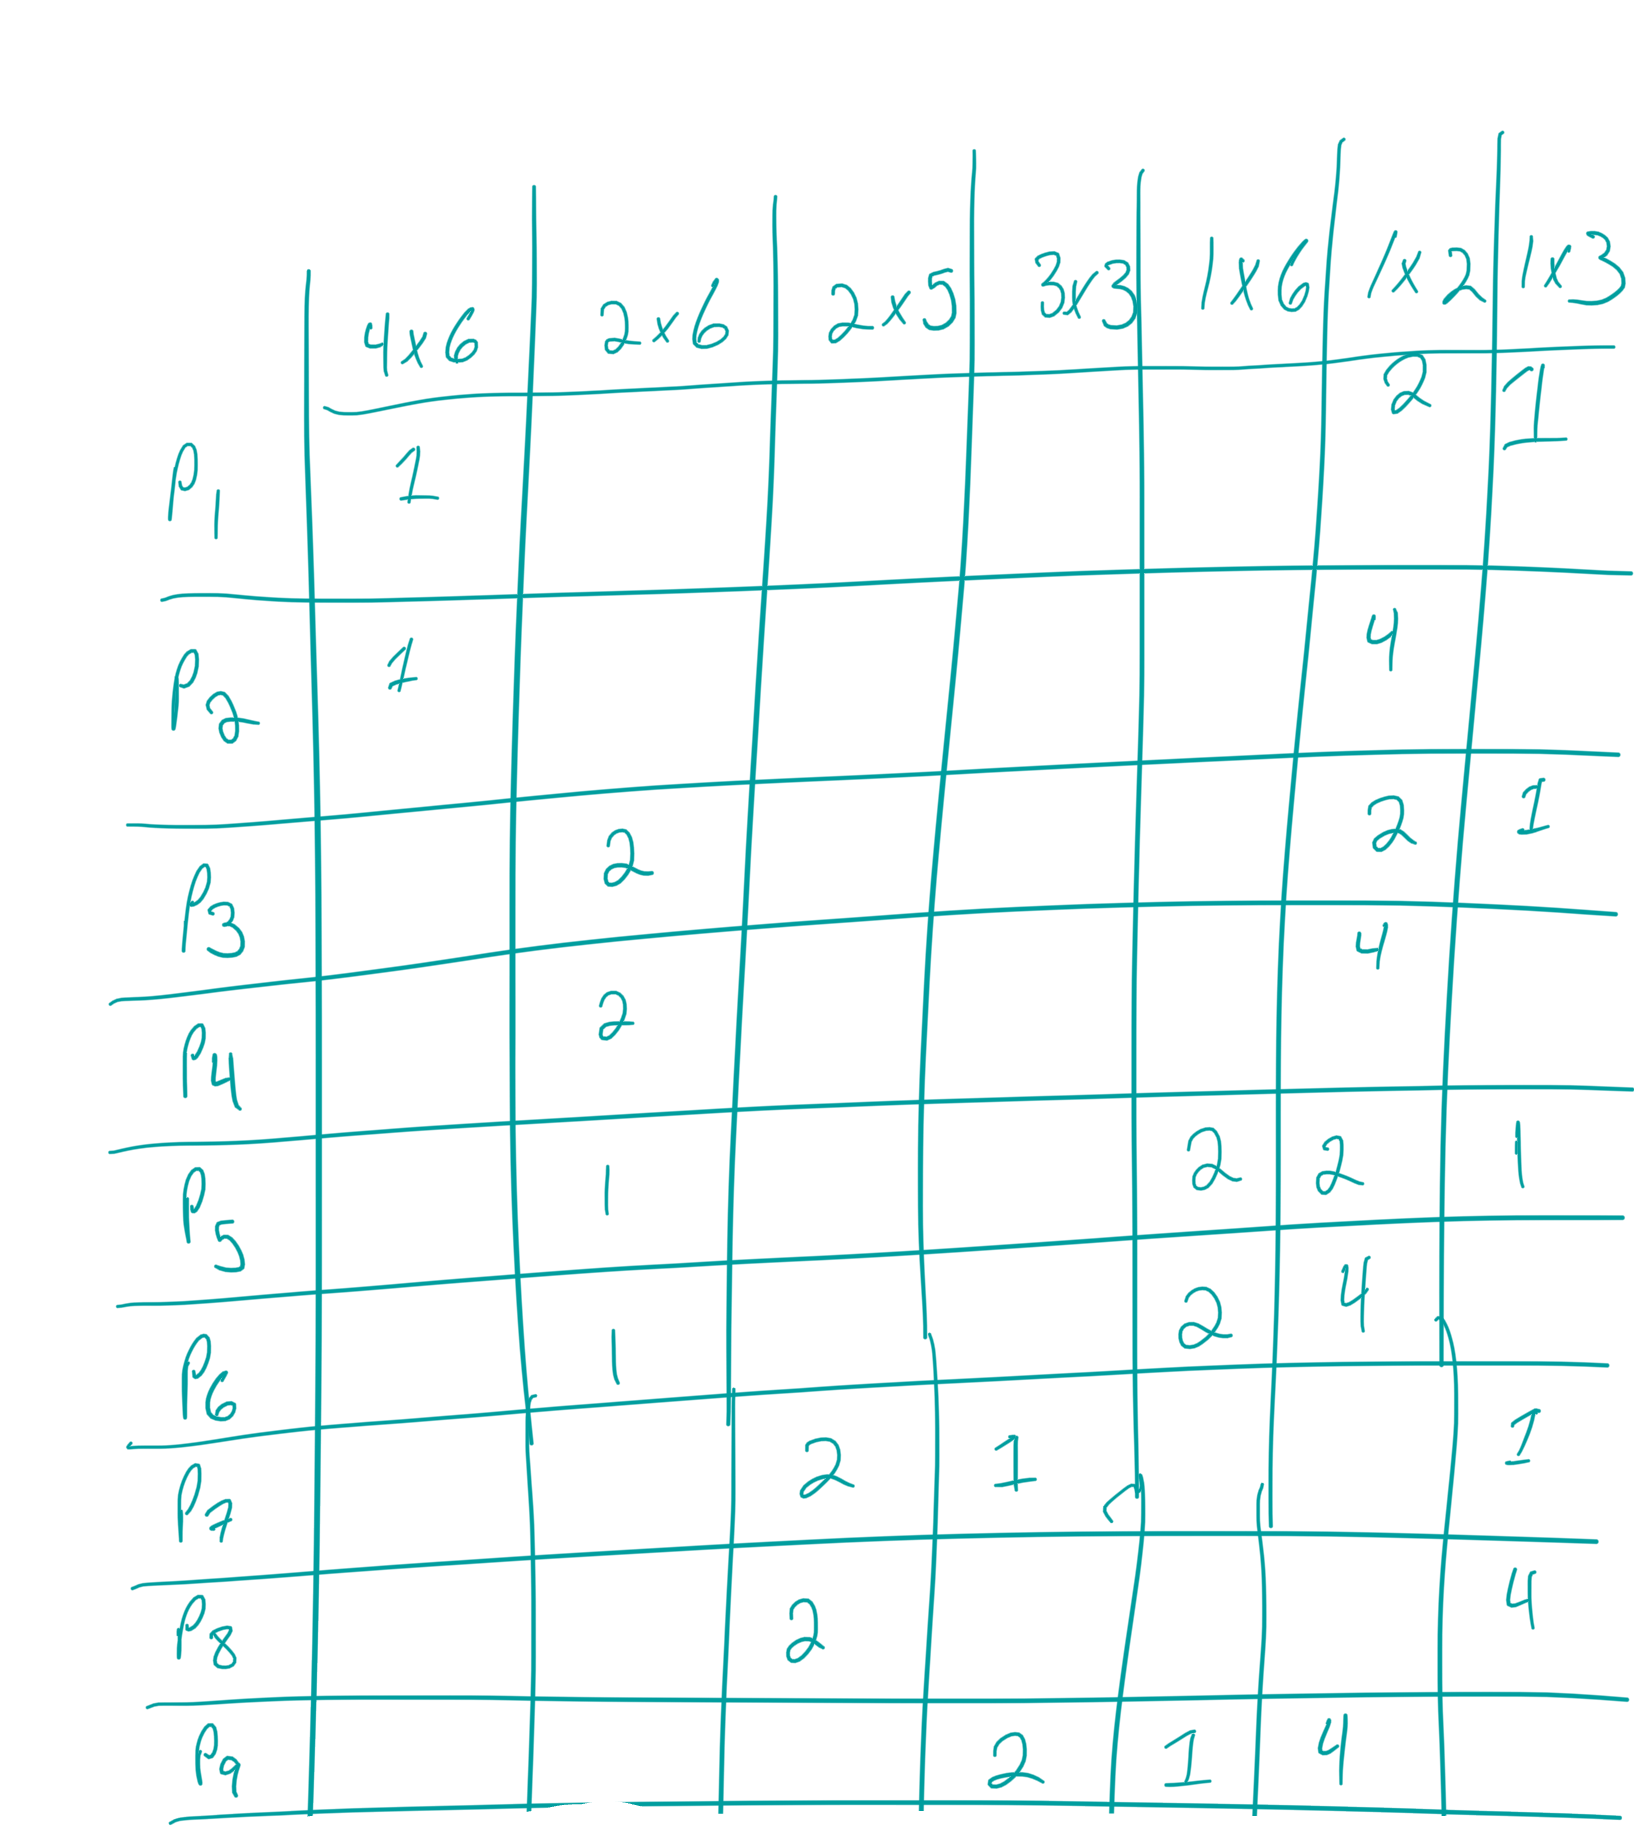


Knowing how many of each pattern we need, we can convert that table into the following set of constraints:

\begin{align}
p_1+p_2&\geq15\\
2p_3+2p_4+p_5+p_6&\geq50 \\
2p_7+2p_8&\geq50\\
p_7+2p_9&\geq40\\
2p_5+2p_6+p_9&\geq40\\
2p_1+4p_2+2p_3+4p_4+2p_5+4p_6+4p_9&\geq245\\
p_1+p_3+p_5+p_7+4p_8&\geq100\\
\forall i\in\{1,\ldots,9\}, p_i&\geq0
\end{align}

However, we now have something in the form of canonical min, which is not what we are trying to solve. So we can multiply each of these constraints by $-1$ to flip the signs should get us into the world of canonical max. That gives:

\begin{align}
p_1+p_2&\geq15\\
2p_3+2p_4+p_5+p_6&\geq50 \\
2p_7+2p_8&\geq50\\
p_7+2p_9&\geq40\\
2p_5+2p_6+p_9&\geq40\\
2p_1+4p_2+2p_3+4p_4+2p_5+4p_6+4p_9&\geq245\\
p_1+p_3+p_5+p_7+4p_8&\geq100\\
\forall i\in\{1,\ldots,9\}, p_i&\geq0
\end{align}


In [47]:
a= -1*np.array([
    [1,1,0,0,0,0,0,0,0,15],
    [0,0,2,2,1,1,0,0,0,50],
    [0,0,0,0,0,0,2,2,0,50],
    [0,0,0,0,0,0,1,0,2,40],
    [0,0,0,0,2,2,0,0,1,40],
    [2,4,2,4,2,4,0,0,4,245],
    [1,0,1,0,1,0,1,4,0,100],
    [1,1,1,1,1,1,1,1,1,0]
  ])
indep_names = ["p1","p2","p3","p4","p5","p6","p7","p8","p9"]

dep_names = ["4x6","2x6","2x5","3x3","1x6","1x2","1x3"]

print_tableau(a,indep_names,dep_names)
a2=pivot(a,7,8,indep_names,dep_names)
a3=pivot(a2,6,2,indep_names,dep_names)
a4=pivot(a3,5,5,indep_names,dep_names)
a5=pivot(a4,4,9,indep_names,dep_names)
a6=pivot(a5,3,7,indep_names,dep_names)
a7=pivot(a6,2,3,indep_names,dep_names)
SimplexBF(a7,indep_names,dep_names)
#


        p1        p2        p3        p4        p5        p6        p7        p8        p9        -1
    -1.000    -1.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000   -15.000    = -4x6
     0.000     0.000    -2.000    -2.000    -1.000    -1.000     0.000     0.000     0.000   -50.000    = -2x6
     0.000     0.000     0.000     0.000     0.000     0.000    -2.000    -2.000     0.000   -50.000    = -2x5
     0.000     0.000     0.000     0.000     0.000     0.000    -1.000     0.000    -2.000   -40.000    = -3x3
     0.000     0.000     0.000     0.000    -2.000    -2.000     0.000     0.000    -1.000   -40.000    = -1x6
    -2.000    -4.000    -2.000    -4.000    -2.000    -4.000     0.000     0.000    -4.000  -245.000    = -1x2
    -1.000     0.000    -1.000     0.000    -1.000     0.000    -1.000    -4.000     0.000  -100.000    = -1x3
    -1.000    -1.000    -1.000    -1.000    -1.000    -1.000    -1.000    -1.000    -1.000     0.000     = obj
 
        p